# Analyzing the behavior before selecting pictures

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def in_08(i, end_data_index):
    if (end_data_index - i + 2) / 2000 <= 0.8:
        return True
    return False


def in_06(i, end_data_index):
    if (end_data_index - i + 2) / 2000 <= 0.6:
        return True
    return False


def in_04(i, end_data_index):
    if (end_data_index - i + 2) / 2000 <= 0.4:
        return True
    return False


def in_02(i, end_data_index):
    if (end_data_index - i + 2) / 2000 <= 0.2:
        return True
    return False


def cal_response_time(start_data_index, end_data_index, data):
    response_time = (end_data_index - 2000 - start_data_index) / 2000
    return response_time


def cal_time_on_pic(chosen_pic, start_data_index, end_data_index, data):
    num_chosen_pic = 0
    num_chosen_pic_08 = 0
    num_chosen_pic_06 = 0
    num_chosen_pic_04 = 0
    num_chosen_pic_02 = 0
    num_pic = 0
    num_pic_08 = 0
    num_pic_06 = 0
    num_pic_04 = 0
    num_pic_02 = 0
    for i in range(start_data_index, end_data_index):
        if type(data[i][-1]) != float and '.png' in data[i][-1]:
            num_pic += 1
            if in_08(i, end_data_index):
                num_pic_08 += 1
                if in_06(i, end_data_index):
                    num_pic_06 += 1
                    if in_04(i, end_data_index):
                        num_pic_04 += 1
                        if in_02(i, end_data_index):
                            num_pic_02 += 1

            if data[i][-1] == chosen_pic:
                num_chosen_pic += 1
                if in_08(i, end_data_index):
                    num_chosen_pic_08 += 1
                    if in_06(i, end_data_index):
                        num_chosen_pic_06 += 1
                        if in_04(i, end_data_index):
                            num_chosen_pic_04 += 1
                            if in_02(i, end_data_index):
                                num_chosen_pic_02 += 1
    total_time_on_pic = num_pic / 2000 
    time_on_pic = num_chosen_pic / 2000
    time_on_pic_08 = num_chosen_pic_08 / 2000
    time_on_pic_06 = num_chosen_pic_06 / 2000
    time_on_pic_04 = num_chosen_pic_04 / 2000
    time_on_pic_02 = num_chosen_pic_02 / 2000
    segment_num = [num_chosen_pic, num_chosen_pic_02, num_chosen_pic_04, num_chosen_pic_06, num_chosen_pic_08]
    total_view_num = [num_pic, num_pic_02, num_pic_04, num_pic_06, num_pic_08]
    prop, prop_02, prop_04, prop_06, prop_08 = cal_prop_on_pic(segment_num, total_view_num)
    return time_on_pic, time_on_pic_02, time_on_pic_04, time_on_pic_06, time_on_pic_08, prop, prop_02, prop_04, prop_06, prop_08, total_time_on_pic


def cal_prop_on_pic(segment_num, total_view_num): #segment_time (5,)
    prop =  0 if (total_view_num[0] == 0) else (float(segment_num[0]) / float(total_view_num[0]))
    prop_02 = 0 if (total_view_num[1] == 0) else (float(segment_num[1]) / float(total_view_num[1]))
    prop_04 = 0 if (total_view_num[2] == 0) else (float(segment_num[2]) / float(total_view_num[2]))
    prop_06 = 0 if (total_view_num[3] == 0) else (float(segment_num[3]) / float(total_view_num[3]))
    prop_08 = 0 if (total_view_num[4] == 0) else (float(segment_num[4]) / float(total_view_num[4]))
    return prop, prop_02, prop_04, prop_06, prop_08 


import math


def do_cal_min_max(q1, q3):
    """计算最小、最大值"""
    min = q1 - 1.5 * (q3 - q1)
    max = q3 + 1.5 * (q3 - q1)
    return min, max


def get_mid_idx(data):
    """获取中位数的索引，如果是偶数个，则是最中间两个数的索引的平均值"""
    length = len(data)
    if length % 2 == 0:
        idx1 = length / 2 - 1
        idx2 = idx1 + 1
        idx = np.mean([idx1, idx2])
    else:
        idx = math.ceil(length / 2)
    return idx


def do_cal_quarter(data):
    # 先从小到大排序
    data.sort()
    # 先获取中位数索引和中位数
    idx = get_mid_idx(data)
    q2 = np.median(data)
    # 被中位数索引等分的两部分
    part1 = [v for i, v in enumerate(data) if i < idx]
    part2 = [v for i, v in enumerate(data) if i > idx]
    # 获取下四分位数
    q1 = np.median(part1)
    # 获取上四分位数
    q3 = np.median(part2)
    return q1, q2, q3

def cal_iqr(output):
    response_time = output[:, 3]
    q1, q2, q3 = do_cal_quarter(response_time)
    print(q1, q3)
    min, max = do_cal_min_max(q1, q3)
    return min, max

In [9]:
days = ['0506', '0518', '0520', '0521', '0525', '0527']#['0223', '0224', '0225', '0226', '0227', '0228', '0302', '0303', '0304', '0305', '0306', '0307']
monkey = 'Mercury'


(4345171, 10)
C:/Users/River/23summer/dku/edf_monkey/Data/Mercury/0506//M_0506_BHV/20230506_bhv.csv
(100, 25)
start time
trial index:  0
start time
trial index:  1
start time
trial index:  2
start time
trial index:  3
start time
trial index:  4
start time
trial index:  5
start time
trial index:  6
start time
trial index:  7
start time
trial index:  8
start time
trial index:  9
start time
trial index:  10
start time
trial index:  11
start time
trial index:  12
start time
trial index:  13
start time
trial index:  14
start time
trial index:  15
start time
trial index:  16
start time
trial index:  17
start time
trial index:  18
start time
trial index:  19
start time
trial index:  20
start time
trial index:  21
start time
trial index:  22
start time
trial index:  23
start time
trial index:  24
start time
trial index:  25
start time
trial index:  26
start time
trial index:  27
start time
trial index:  28
start time
trial index:  29
start time
trial index:  30
start time
trial index:  31
star

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3917264, 10)
C:/Users/River/23summer/dku/edf_monkey/Data/Mercury/0518//M_0518_BHV/20230518_bhv.csv
(100, 25)
start time
trial index:  0
start time
trial index:  1
start time
trial index:  2
start time
trial index:  3
start time
trial index:  4
start time
trial index:  5
start time
trial index:  6
start time
trial index:  7
start time
trial index:  8
start time
trial index:  9
start time
trial index:  10
start time
trial index:  11
start time
trial index:  12
start time
trial index:  13
start time
trial index:  14
start time
trial index:  15
start time
trial index:  16
start time
trial index:  17
start time
trial index:  18
start time
trial index:  19
start time
trial index:  20
start time
trial index:  21
start time
trial index:  22
start time
trial index:  23
start time
trial index:  24
start time
trial index:  25
start time
trial index:  26
start time
trial index:  27
start time
trial index:  28
start time
trial index:  29
start time
trial index:  30
start time
trial index:  31
star

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(4542325, 10)
C:/Users/River/23summer/dku/edf_monkey/Data/Mercury/0520//M_0520_BHV/20230520_bhv.csv
(100, 25)
start time
trial index:  0
start time
trial index:  1
start time
trial index:  2
start time
trial index:  3
start time
trial index:  4
start time
trial index:  5
start time
trial index:  6
start time
trial index:  7
start time
trial index:  8
start time
trial index:  9
start time
trial index:  10
start time
trial index:  11
start time
trial index:  12
start time
trial index:  13
start time
trial index:  14
start time
trial index:  15
start time
trial index:  16
start time
trial index:  17
start time
trial index:  18
start time
trial index:  19
start time
trial index:  20
start time
trial index:  21
start time
trial index:  22
start time
trial index:  23
start time
trial index:  24
start time
trial index:  25
start time
trial index:  26
start time
trial index:  27
start time
trial index:  28
start time
trial index:  29
start time
trial index:  30
start time
trial index:  31
star

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


start time
trial index:  96
start time
trial index:  97
start time
trial index:  98
start time
trial index:  99
date,  0520 , final trial number: 100
0.357 1.4175
-1.23375 3.00825
3.242
3.396
4.277
4.462
4.656
5.558
6.154
7.107
7.235
9.99
10.066
13.011
52.056
52.414
55.586
57.928
59.0
[0.06646886047954065, 0.09505867549922338]
[0.08258131889173882, 0.12581572573452518]
(4125417, 10)
C:/Users/River/23summer/dku/edf_monkey/Data/Mercury/0521//M_0521_BHV/20230521_bhv.csv
(100, 24)
start time
trial index:  0
start time
trial index:  1
start time
trial index:  2
start time
trial index:  3
start time
trial index:  4
start time
trial index:  5
start time
trial index:  6
start time
trial index:  7
start time
trial index:  8
start time
trial index:  9
start time
trial index:  10
start time
trial index:  11
start time
trial index:  12
start time
trial index:  13
start time
trial index:  14
start time
trial index:  15
start time
trial index:  16
start time
trial index:  17
start time
trial index: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


start time
trial index:  97
start time
trial index:  98
start time
trial index:  99
date,  0521 , final trial number: 100
0.261 1.0785
-0.96525 2.3047500000000003
2.539
2.688
3.109
3.149
4.221
4.922
4.972
5.197
18.076
[0.06826205291143791, 0.07884240198387535]
[0.08783970675711414, 0.0774939572088048]
(4148023, 10)
C:/Users/River/23summer/dku/edf_monkey/Data/Mercury/0525//M_0525_BHV/20230525_bhv.csv
(100, 24)
start time
trial index:  0
start time
trial index:  1
start time
trial index:  2
start time
trial index:  3
start time
trial index:  4
start time
trial index:  5
start time
trial index:  6
start time
trial index:  7
start time
trial index:  8
start time
trial index:  9
start time
trial index:  10
start time
trial index:  11
start time
trial index:  12
start time
trial index:  13
start time
trial index:  14
start time
trial index:  15
start time
trial index:  16
start time
trial index:  17
start time
trial index:  18
start time
trial index:  19
start time
trial index:  20
start tim

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


start time
trial index:  96
start time
trial index:  97
start time
trial index:  98
start time
trial index:  99
date,  0525 , final trial number: 100
0.20500000000000002 0.7055
-0.54575 1.4562499999999998
1.484
1.519
1.574
1.575
2.009
2.143
2.448
2.503
[0.0746430806852638, 0.07214129987403152]
[0.049876351527354, 0.04443581080672752]
(5009944, 10)
C:/Users/River/23summer/dku/edf_monkey/Data/Mercury/0527//M_0527_BHV/20230527_bhv.csv
(100, 24)
start time
trial index:  0
start time
trial index:  1
start time
trial index:  2
start time
trial index:  3
start time
trial index:  4
start time
trial index:  5
start time
trial index:  6
start time
trial index:  7
start time
trial index:  8
start time
trial index:  9
start time
trial index:  10
start time
trial index:  11
start time
trial index:  12
start time
trial index:  13
start time
trial index:  14
start time
trial index:  15
start time
trial index:  16
start time
trial index:  17
start time
trial index:  18
start time
trial index:  19
star

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.06163923541381245, 0.052567311032362236]


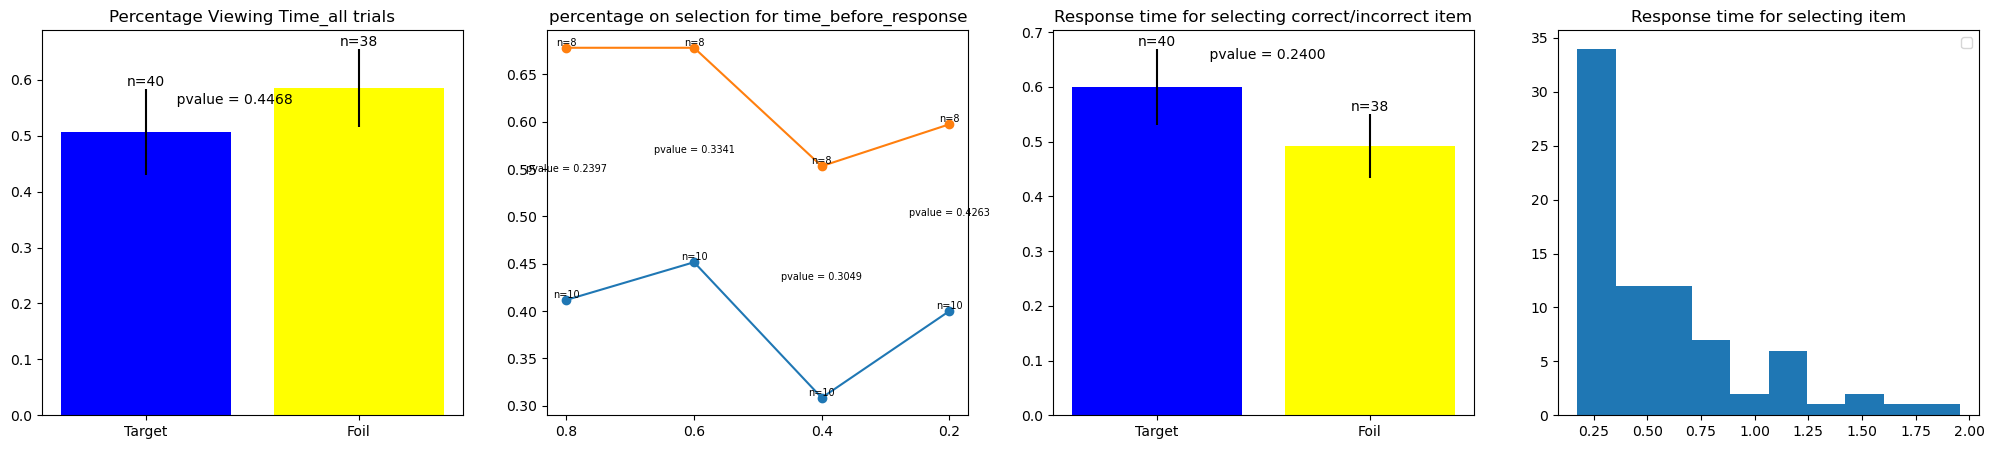

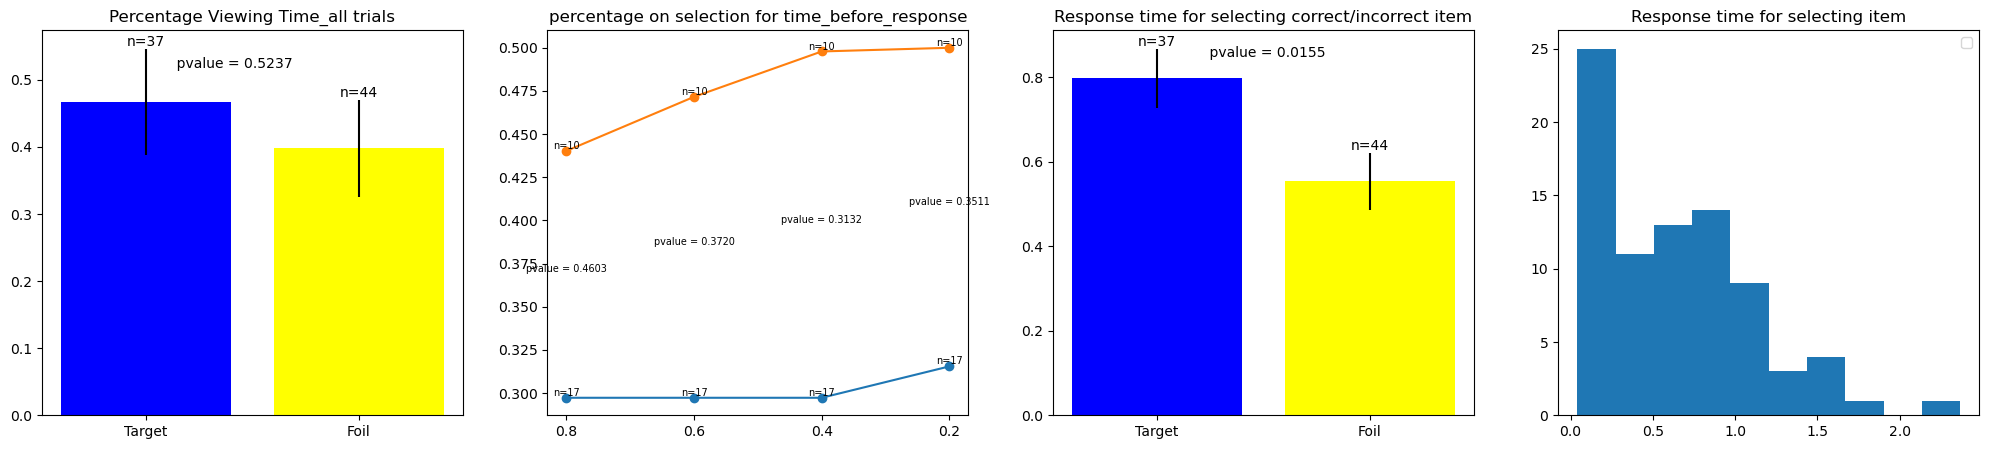

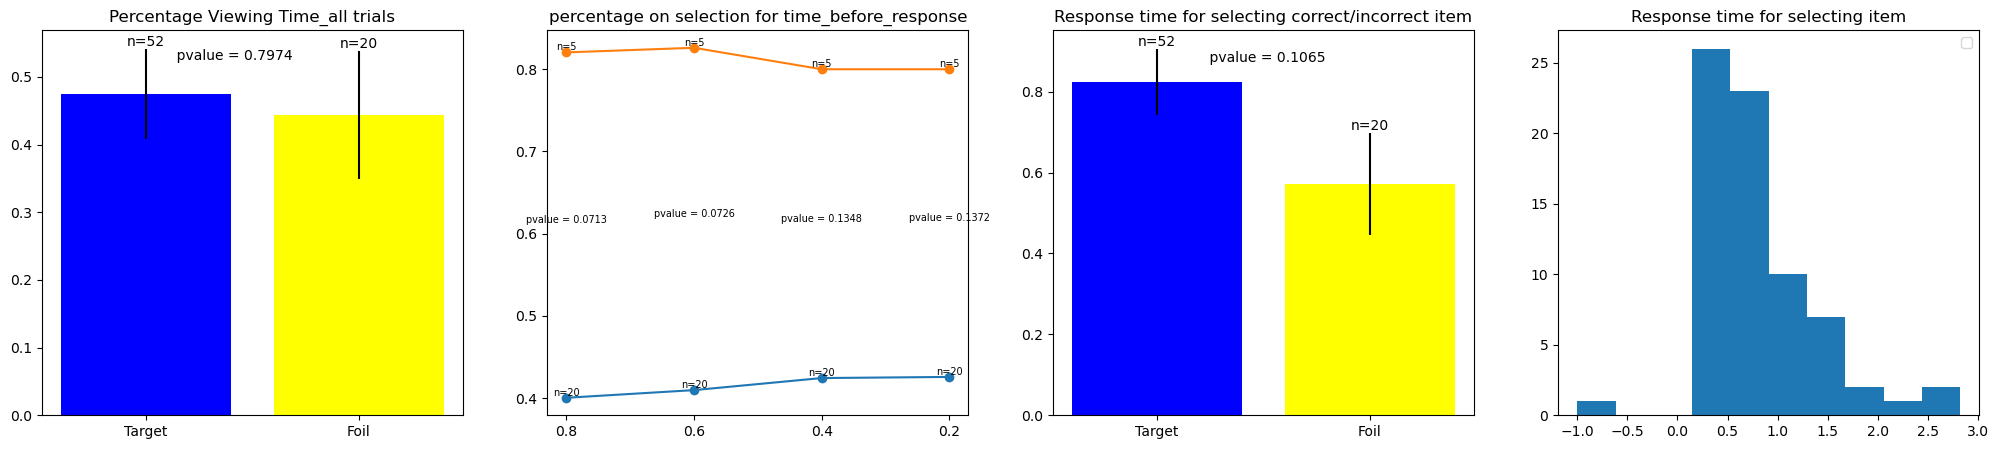

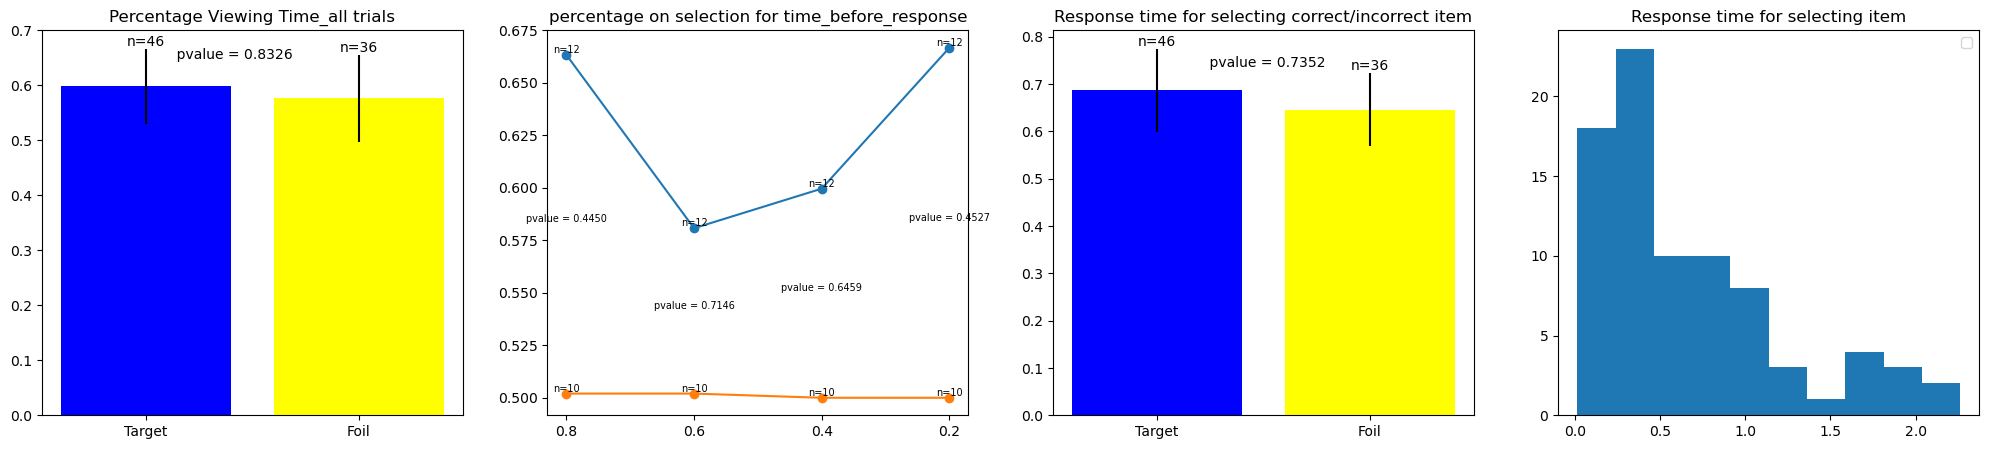

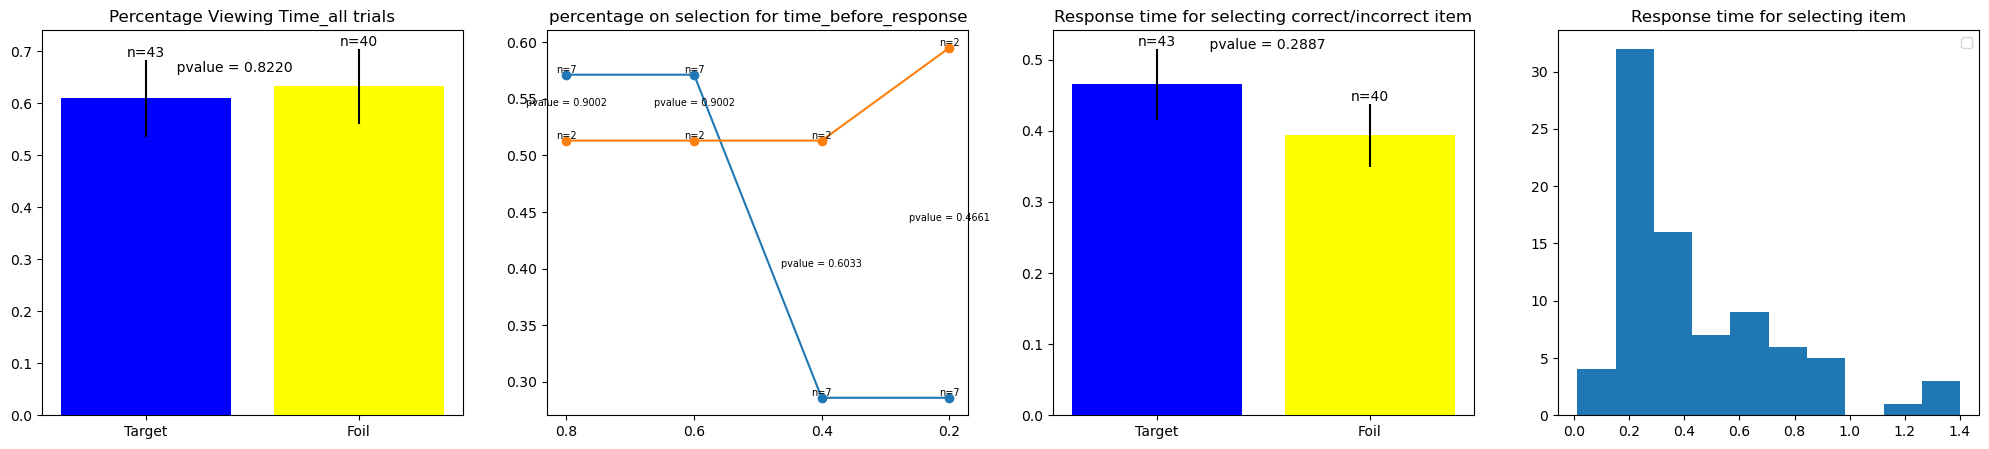

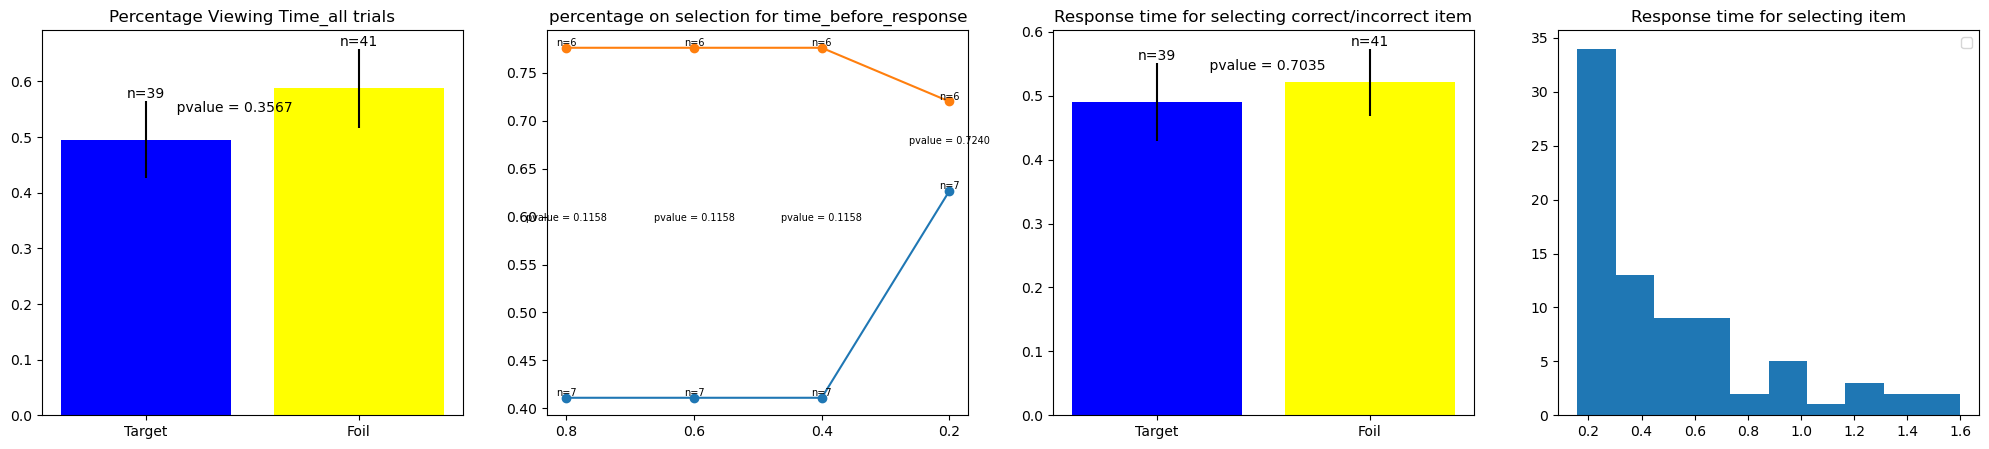

In [10]:
for day in days:
    expect_dir = f'C:/Users/River/23summer/dku/edf_monkey/Data/{monkey}/{day}/'
    headers = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']
    data_f = pd.read_csv(''+ expect_dir +'/final_data.csv', sep=',', skiprows = 1, header=None, names=headers, dtype={"col1": int, "col2": float, "col3": object, "col4": object, "col5": float, "col6": float, "col7": object, "col8": object, "col9": object, "col10": object})
    data = data_f.to_numpy()
    print(np.shape(data))
    output = np.empty((100, 17), dtype=object)
    output[:] = ""
    df_header = pd.read_csv(''+expect_dir+'/M_'+day+'_BHV/2023'+day+'_bhv.csv')
    print(''+expect_dir+'/M_'+day+'_BHV/2023'+day+'_bhv.csv')
    print(df_header.shape)
    
    trial_index = 0
    current_data_index = 0
    # 0:5 trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, 
    # 6:10 time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, 
    # 11:15 percent_on_pic_trial, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8
    try:
        while current_data_index < np.shape(data)[0] and trial_index < 1300:
            if data[current_data_index][-2] is np.nan:
                current_data_index += 1
            elif 'forcedchoice_start' in data[current_data_index][-2]:
                output[trial_index][0] = trial_index
                output[trial_index][1] = data[current_data_index][1]
                print("start time", )
                start_data_index = current_data_index
                while (type(data[current_data_index][-2]) != float ) and ('forcedchoice_start' in data[current_data_index][-2]):
                    current_data_index += 1
                end_data_index = current_data_index
                print("trial index: ", trial_index)
                output[trial_index][2] = data[end_data_index - 1][1]
                output[trial_index][3] = cal_response_time(start_data_index, end_data_index, data)
                output[trial_index][4] = df_header['pic_chosen_position'][trial_index]
                output[trial_index][5] = df_header['response'][trial_index]
                chosen_pic = df_header['pic_chosen'][trial_index]
                output[trial_index][6], output[trial_index][7], output[trial_index][8], output[trial_index][9], output[trial_index][10], output[trial_index][11], output[trial_index][12], output[trial_index][13], output[trial_index][14], output[trial_index][15], output[trial_index][16] = cal_time_on_pic(chosen_pic, start_data_index, end_data_index - 2000, data)
                trial_index += 1
            elif 'forcedmemory_start' in data[current_data_index][-2]:
                current_data_index += 1
            else:
                print("error occurs in line", current_data_index)
                raise(ValueError) 
        print('date, ', day, ', final trial number:', trial_index)
    except ValueError:
        print("???")

    pd.DataFrame(output).to_csv('graph_Mercury/output_'+day+'.csv', index = False)
    correct_response_time = []
    incorrect_response_time = []
    target_valid = []
    target_valid_08 = []
    target_valid_06 = []
    target_valid_04 = []
    target_valid_02 = []
    foil_valid = []
    foil_valid_08 = []
    foil_valid_06 = []
    foil_valid_04 = []
    foil_valid_02 = []

    min, max = cal_iqr(output)
    print(min, max)
    for record in output:
        if record[3] <= max and record[3] >= min:
            if record[5] == 1:
                
                if record[16] != 0:
                    correct_response_time.append(record[3])
                    target_valid.append(record[11])
                    if record[3] >= 0.8:
                        target_valid_02.append(record[12])
                        target_valid_04.append(record[13])
                        target_valid_06.append(record[14])
                        target_valid_08.append(record[15])
            elif record[5] == 0:
                
                if record[16] != 0:
                    foil_valid.append(record[11])
                    incorrect_response_time.append(record[3])
                    if record[3] >= 0.8:
                        foil_valid_02.append(record[12])
                        foil_valid_04.append(record[13])
                        foil_valid_06.append(record[14])
                        foil_valid_08.append(record[15])
        else:
            print(record[3])


    from scipy import stats
    plt.figure(figsize=(25,5))
    plt.subplot(1,4,1)
    plt.title('Percentage Viewing Time_all trials')
    #plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
    sem = [stats.sem(target_valid), stats.sem(foil_valid)]
    print(sem)
    stat, pvalue = stats.ttest_ind(target_valid, foil_valid)
    p1 = plt.bar(['Target','Foil'], [np.mean(target_valid), np.mean(foil_valid)], yerr = sem, color=['blue','yellow'], width=0.8)
    l = [f'n={len(target_valid)}', f'n={len(foil_valid)}']
    plt.bar_label(p1, labels = l)
    plt.text('Target',np.mean(target_valid) + 0.05, '       pvalue = %.4f' % pvalue)

    plt.subplot(1,4,2)
    plt.title('percentage on selection for time_before_response')
    x_axis = ["0.8", "0.6", "0.4", "0.2"]
    target = [target_valid_08, target_valid_06, target_valid_04, target_valid_02]
    foil = [foil_valid_08, foil_valid_06, foil_valid_04, foil_valid_02]
    mean_values_target = [np.mean(target_valid_08), np.mean(target_valid_06), np.mean(target_valid_04), np.mean(target_valid_02)]
    mean_values_foil = [np.mean(foil_valid_08), np.mean(foil_valid_06), np.mean(foil_valid_04), np.mean(foil_valid_02)]
    std_values_target = [np.std(target_valid_08), np.std(target_valid_06), np.std(target_valid_04), np.std(target_valid_02)]
    std_values_foil = [np.std(foil_valid_08), np.std(foil_valid_06), np.std(foil_valid_04), np.std(foil_valid_02)]
    p2 = plt.plot(x_axis, mean_values_target, marker='o', label='target')
    l_target = [f'n={len(target_valid_08)}', f'n={len(target_valid_06)}', f'n={len(target_valid_04)}', f'n={len(target_valid_02)}']
    i = 0
    for a,b in zip(x_axis,mean_values_target):
        plt.text(a,b,l_target[i], ha = 'center',va = 'bottom',fontsize=7)
        i += 1
    # Plot the second line
    p3 = plt.plot(x_axis, mean_values_foil, marker='o', label='foil')
    l_foil = [f'n={len(foil_valid_08)}', f'n={len(foil_valid_06)}', f'n={len(foil_valid_04)}', f'n={len(foil_valid_02)}']
    i = 0
    for a,b in zip(x_axis,mean_values_foil):
        plt.text(a,b,l_foil[i], ha = 'center',va = 'bottom',fontsize=7)
        i += 1

    i = 0
    for a,b,c in zip(x_axis,mean_values_foil, mean_values_target):
        stat, pvalue = stats.ttest_ind(target[i], foil[i])
        plt.text(a,(b + c) / 2, 'pvalue = %.4f' % pvalue, ha = 'center',va = 'bottom',fontsize=7)
        i += 1

    plt.subplot(1,4,3)
    plt.title('Response time for selecting correct/incorrect item')
    #plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
    sem = [stats.sem(correct_response_time), stats.sem(incorrect_response_time)]
    print(sem)
    stat, pvalue = stats.ttest_ind(correct_response_time, incorrect_response_time)
    p1 = plt.bar(['Target','Foil'], [np.mean(correct_response_time), np.mean(incorrect_response_time)], yerr = sem, color=['blue','yellow'], width=0.8)
    l = [f'n={len(correct_response_time)}', f'n={len(incorrect_response_time)}']
    plt.bar_label(p1, labels = l)
    plt.text('Target',np.mean(correct_response_time) + 0.05, '            pvalue = %.4f' % pvalue)


    plt.subplot(1,4,4)
    plt.title('Response time for selecting item')
    #plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
    plt.hist(correct_response_time+incorrect_response_time)
    plt.legend()
    plt.savefig('graph_Mercury/output' + day + '.png')

In [ ]:
day = '0301'
headers = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']
data_f = pd.read_csv(''+day+'/final_data.csv', sep=',', skiprows = 1, header=None, names=headers, dtype={"col1": int, "col2": float, "col3": object, "col4": object, "col5": float, "col6": float, "col7": object, "col8": object, "col9": object, "col10": object})
data = data_f.to_numpy()
print(np.shape(data))

## output format
- trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8
- time: 1s = 2000 lines, 0.2s = 400, 0.4s = 800, 0.6s = 1200, 0.8s = 1600. Thus, 1 line = 1/2000s

In [ ]:
output = np.empty((96, 17), dtype=object)
output[:] = ""


In [ ]:
df_header = pd.read_csv(''+day+'/J_'+day+'_BHV/2023'+day+'_bhv.csv')#'merged_behavior.csv')
#print(''+day+'/J_'+day+'_BHV/2023'+day+'_bhv.csv')
print(df_header.shape)

# headers = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']
# data_f = pd.read_csv('merged_data.csv', sep=',', skiprows = 1, header=None, names=headers, dtype={"col1": int, "col2": float, "col3": object, "col4": object, "col5": float, "col6": float, "col7": object, "col8": object, "col9": object, "col10": object})
# data = data_f.to_numpy()
# print(data.shape)

In [ ]:
trial_index = 0
current_data_index = 0
# 0:5 trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, 
# 6:10 time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, 
# 11:15 percent_on_pic_trial, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8
try:
    while current_data_index < np.shape(data)[0] and trial_index < 1300:
        if data[current_data_index][-2] is np.nan:
            current_data_index += 1
        elif 'forcedchoice_start' in data[current_data_index][-2]:
            output[trial_index][0] = trial_index
            output[trial_index][1] = data[current_data_index][1]
            print("start time", )
            start_data_index = current_data_index
            while (type(data[current_data_index][-2]) != float ) and ('forcedchoice_start' in data[current_data_index][-2]):
                current_data_index += 1
            end_data_index = current_data_index
            print("trial index: ", trial_index)
            output[trial_index][2] = data[end_data_index - 1][1]
            output[trial_index][3] = cal_response_time(start_data_index, end_data_index, data)
            output[trial_index][4] = df_header['pic_chosen_position'][trial_index]
            output[trial_index][5] = df_header['response'][trial_index]
            chosen_pic = df_header['pic_chosen'][trial_index]
            output[trial_index][6], output[trial_index][7], output[trial_index][8], output[trial_index][9], output[trial_index][10], output[trial_index][11], output[trial_index][12], output[trial_index][13], output[trial_index][14], output[trial_index][15], output[trial_index][16] = cal_time_on_pic(chosen_pic, start_data_index, end_data_index - 2000, data)
            trial_index += 1
        elif 'forcedmemory_start' in data[current_data_index][-2]:
            current_data_index += 1
        else:
            print("error occurs in line", current_data_index)
            raise(ValueError) 
except ValueError:
    print("???")

In [ ]:
pd.DataFrame(output).to_csv('merged_output.csv', index = False)

In [ ]:
pd.DataFrame(output).to_csv('graph/output_'+day+'.csv', index = False)

In [ ]:
# 0:5 trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, 
# 6:10 time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, 
# 11:15 percent_on_pic_trial, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8
correct_response_time = []
incorrect_response_time = []
target_valid = []
target_valid_08 = []
target_valid_06 = []
target_valid_04 = []
target_valid_02 = []
foil_valid = []
foil_valid_08 = []
foil_valid_06 = []
foil_valid_04 = []
foil_valid_02 = []

min, max = cal_iqr(output)
print(min, max)
for record in output:
    if record[3] <= max and record[3] >= min:
        if record[5] == 1:
            
            if record[16] != 0:
                correct_response_time.append(record[3])
                target_valid.append(record[11])
                if record[3] >= 0.8:
                    target_valid_02.append(record[12])
                    target_valid_04.append(record[13])
                    target_valid_06.append(record[14])
                    target_valid_08.append(record[15])
        elif record[5] == 0:
            
            if record[16] != 0:
                foil_valid.append(record[11])
                incorrect_response_time.append(record[3])
                if record[3] >= 0.8:
                    foil_valid_02.append(record[12])
                    foil_valid_04.append(record[13])
                    foil_valid_06.append(record[14])
                    foil_valid_08.append(record[15])
    else:
        print(record[3])



In [ ]:
len(foil_valid_08)

In [ ]:
from scipy import stats
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
plt.title('Percentage Viewing Time_all trials')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
sem = [stats.sem(target_valid), stats.sem(foil_valid)]
print(sem)
stat, pvalue = stats.ttest_ind(target_valid, foil_valid)
p1 = plt.bar(['Target','Foil'], [np.mean(target_valid), np.mean(foil_valid)], yerr = sem, color=['blue','yellow'], width=0.8)
l = [f'n={len(target_valid)}', f'n={len(foil_valid)}']
plt.bar_label(p1, labels = l)
plt.text('Target',0.4, 'pvalue = %.4f' % pvalue)

plt.subplot(1,4,2)
plt.title('percentage on selection for time_before_response')
x_axis = ["0.8", "0.6", "0.4", "0.2"]
target = [target_valid_08, target_valid_06, target_valid_04, target_valid_02]
foil = [foil_valid_08, foil_valid_06, foil_valid_04, foil_valid_02]
mean_values_target = [np.mean(target_valid_08), np.mean(target_valid_06), np.mean(target_valid_04), np.mean(target_valid_02)]
mean_values_foil = [np.mean(foil_valid_08), np.mean(foil_valid_06), np.mean(foil_valid_04), np.mean(foil_valid_02)]
std_values_target = [np.std(target_valid_08), np.std(target_valid_06), np.std(target_valid_04), np.std(target_valid_02)]
std_values_foil = [np.std(foil_valid_08), np.std(foil_valid_06), np.std(foil_valid_04), np.std(foil_valid_02)]
p2 = plt.plot(x_axis, mean_values_target, marker='o', label='target')
l_target = [f'n={len(target_valid_08)}', f'n={len(target_valid_06)}', f'n={len(target_valid_04)}', f'n={len(target_valid_02)}']
i = 0
for a,b in zip(x_axis,mean_values_target):
    plt.text(a,b,l_target[i], ha = 'center',va = 'bottom',fontsize=7)
    i += 1
# Plot the second line
p3 = plt.plot(x_axis, mean_values_foil, marker='o', label='foil')
l_foil = [f'n={len(foil_valid_08)}', f'n={len(foil_valid_06)}', f'n={len(foil_valid_04)}', f'n={len(foil_valid_02)}']
i = 0
for a,b in zip(x_axis,mean_values_foil):
    plt.text(a,b,l_foil[i], ha = 'center',va = 'bottom',fontsize=7)
    i += 1

i = 0
for a,b,c in zip(x_axis,mean_values_foil, mean_values_target):
    stat, pvalue = stats.ttest_ind(target[i], foil[i])
    plt.text(a,(b + c) / 2, 'pvalue = %.4f' % pvalue, ha = 'center',va = 'bottom',fontsize=7)
    i += 1

plt.subplot(1,4,3)
plt.title('Response time for selecting correct/incorrect item')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
sem = [stats.sem(correct_response_time), stats.sem(incorrect_response_time)]
print(sem)
stat, pvalue = stats.ttest_ind(correct_response_time, incorrect_response_time)
p1 = plt.bar(['Target','Foil'], [np.mean(correct_response_time), np.mean(incorrect_response_time)], yerr = sem, color=['blue','yellow'], width=0.8)
l = [f'n={len(correct_response_time)}', f'n={len(incorrect_response_time)}']
plt.bar_label(p1, labels = l)
plt.text('Target',0.75, '            pvalue = %.4f' % pvalue)


plt.subplot(1,4,4)
plt.title('Response time for selecting item')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
plt.hist(correct_response_time+incorrect_response_time)
plt.legend()
plt.savefig('graph/output' + day + '.png')

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Response time for selecting item')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
plt.hist(correct_response_time+incorrect_response_time)
plt.legend()

In [ ]:
list_day = ['0301']
count = 0
for current_dir in list_day:
    for i in range(1, 6):
        expect_dir = f'{current_dir}/{current_dir}0{i}/msg.csv'
        print(expect_dir)
        msg = pd.read_csv(expect_dir)
        data = msg.to_numpy()
        start_time = -1
        for line in data:
            if 'forcedchoice_start' in line[3]:
                start_time = line[2]
                print("!!!!!!!!", line[3], start_time)
            if 'forcedchoice_end' in line[3]:
                end_time = line[2]
                print(end_time)
                count += 1
                print(count)
                start_time = -1
        
